In [ ]:
## Prob

## PDF

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

from sklearn.kernel_ridge import KernelRidge

In [2]:
mu1, sigma1 = 3, 0.4
mu2, sigma2 = 5, 0.6

In [3]:
def sample_points():
    s1 = np.random.normal(mu1, sigma1, 20)

    s2 = np.random.normal(mu2, sigma2, 20)

    return list(s1) + list(s2)

In [4]:
# generate points used to plot
x_plot = np.linspace(0, 8, 100)

# generate points and keep a subset of them
x = sample_points()

lw = 2

In [5]:
def kernel(x1, x2, b = 2):
    z = (x1 - x2) / b
    return (1/math.sqrt(2 * 3.14)) * np.exp(-z**2/2)

def fb(x, data, b):
    return 1/(len(data)*b) * sum([kernel(x, xi, b) for xi in data])

def sum_pdf(x):
    result = []
    for i in range(len(x)):
        result.append((sp.stats.norm.pdf(x, mu1, sigma1)[i] + sp.stats.norm.pdf(x, mu2, sigma2)[i])/2)
    return result

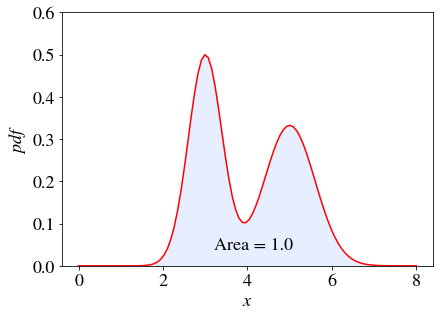

In [7]:
plt.figure(0)
axes = plt.gca()
axes.set_ylim([0,0.6])
plt.plot(x_plot,sum_pdf(x_plot), color='red')
section = np.arange(0, 8, 1/20.)
plt.fill_between(section,sum_pdf(section), color='#e6eeff')
plt.text(3.2, 0.04, "Area = 1.0", fontsize=18)
plt.xlabel("$x$")
plt.ylabel("$pdf$")

#plt.legend(loc='lower left')
fig1 = plt.gcf()
fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.12, hspace = 0, wspace = 0)

plt.show()

## PMF

In [8]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

(0.0, 0.6)

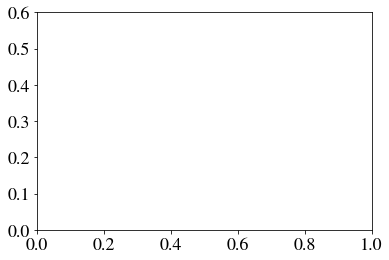

In [9]:
x = np.arange(4)
pr = [0.1, 0.3, 0.4, 0.2]

axes = plt.gca()
axes.set_ylim([0,0.6])

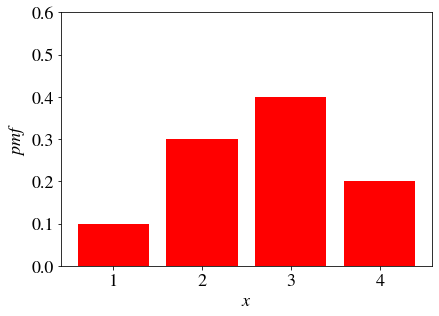

In [11]:
plt.bar(x, pr, color="red")
plt.xticks(x, ('1', '2', '3', '4'))
plt.yticks(np.arange(0, 0.7, 0.1))
plt.xlabel("$x$")
plt.ylabel("$pmf$")

fig1 = plt.gcf()
fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.12, hspace = 0, wspace = 0)

plt.show()

### Density Estimation

In [12]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import math

from sklearn.neighbors import KernelDensity

import scipy.integrate as integrate
from sklearn.kernel_ridge import KernelRidge

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

In [13]:
mu1, sigma1 = 3.0, 1.0
mu2, sigma2 = 8.0, 1.5

In [14]:
def sample_points():
    s1 = np.random.normal(mu1, sigma1, 50)

    s2 = np.random.normal(mu2, sigma2, 50)

    return list(s1) + list(s2)

In [15]:
# generate points used to plot
x_plot = np.linspace(0, 12, 100)

# generate points and keep a subset of them
x = sample_points()

colors = ['red', 'blue', 'orange', 'green']
lw = 2

In [16]:
def kernel(x1, x2, bi = 2.0):
    z = (x1 - x2) / bi
    return (1.0/math.sqrt(2.0 * 3.14)) * math.exp((-1.0/2.0)*(z**2))

def fb(xx, data, bi):
    return (1/(len(data)*bi)) * sum([kernel(xx, xi, bi) for xi in data])

def fbi(i, data, bi):
    data_minus_i = []
    for ii in range(len(data)):
        if i != ii:
            data_minus_i.append(data[ii])
    return (1/(len(data_minus_i)*bi)) * sum([kernel(data[i], xi, bi) for xi in data_minus_i])


def sum_pdf(x):
    result = []
    for i in range(len(x)):
        result.append((sp.stats.norm.pdf(x, mu1, sigma1)[i] + sp.stats.norm.pdf(x, mu2, sigma2)[i])/2.0)
        #result.append(sp.stats.norm.pdf(x, mu1, sigma1)[i])
    return result

In [17]:
b = np.linspace(0.01, 3.0, 100)

score = []
for bi in b:
    def fb2(xx):
        return fb(xx, x, bi)**2

    s = integrate.quad(fb2, -np.inf, np.inf)[0] - 2.0*np.mean([fbi(i, x, bi) for i in range(len(x))])
    score.append(s)

/var/folders/3z/gy9dgz294xvgty7v8hhlbv0h0000gn/T/ipykernel_39612/1844911469.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  s = integrate.quad(fb2, -np.inf, np.inf)[0] - 2.0*np.mean([fbi(i, x, bi) for i in range(len(x))])
/var/folders/3z/gy9dgz294xvgty7v8hhlbv0h0000gn/T/ipykernel_39612/1844911469.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  s = integrate.quad(fb2, -np.inf, np.inf)[0] - 2.0*np.mean([fbi(i, x, bi) for i in range(len(x))])


0.5234343434343435


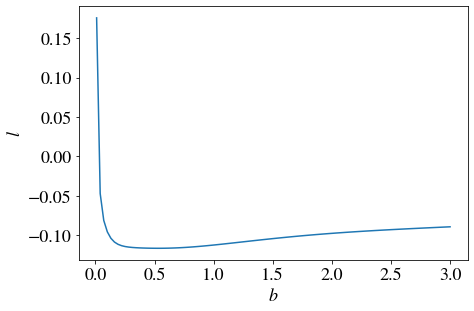

In [19]:
plt.figure(1)
plt.plot(b,score)
plt.xlabel("$b$")
plt.ylabel("$l$")
plt.tight_layout()
plt.xticks(np.arange(0, 3.5, 0.5))
#plt.show()
fig1 = plt.gcf()
fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)
minb = [bi for bi, s in zip(b, score) if s == min(score)][0]
print(minb)

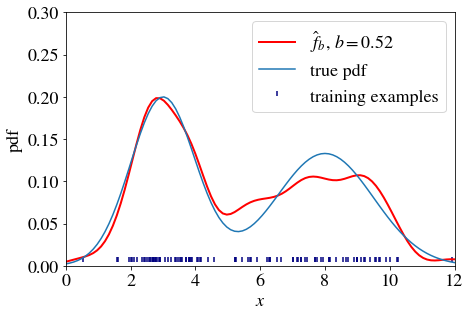

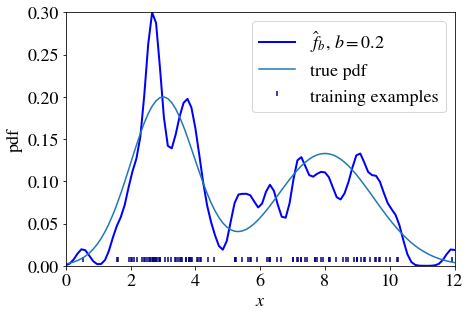

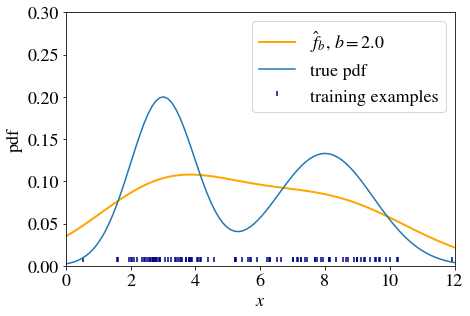

In [20]:
for count, degree in enumerate([round(minb, 2)] + [0.2, 2.0]):
    plt.figure(count+2)
    axes = plt.gca()
    axes.set_xlim([0,12])
    axes.set_ylim([0,0.3])
    plt.xlabel("$x$")
    plt.ylabel("pdf")
    plt.scatter(x, [0.005] * len(x), color='navy', s=30, marker=2, label="training examples")
    plt.plot(x_plot, [fb(xp ,x, degree) for xp in x_plot], color=colors[count], linewidth=lw, label="$\\hat{f}_b$, $b = " + str(degree) + "$")
    plt.plot(x_plot,sum_pdf(x_plot), label="true pdf")

    plt.legend(loc='upper right')
    plt.tight_layout()

    fig1 = plt.gcf()
    fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)
    plt.show()

### Probability

In [21]:
from collections import Counter
import math, random

In [22]:
def random_kid():
    return random.choice(["boy", "girl"])

def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    "returns the probability that a uniform random variable is less than x"
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X < 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

def plot_normal_pdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend()
    plt.show()

def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def plot_normal_cdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.show()

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):

    data = [binomial(p, n) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.show()



if __name__ == "__main__":

    #
    # CONDITIONAL PROBABILITY
    #

    both_girls = 0
    older_girl = 0
    either_girl = 0

    random.seed(0)
    for _ in range(10000):
        younger = random_kid()
        older = random_kid()
        if older == "girl":
            older_girl += 1
        if older == "girl" and younger == "girl":
            both_girls += 1
        if older == "girl" or younger == "girl":
            either_girl += 1

    print("P(both | older):", both_girls / older_girl)      # 0.514 ~ 1/2
    print("P(both | either): ", both_girls / either_girl)   # 0.342 ~ 1/3


P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325
